############################## One-hot encoding of words and characters ##############################################

One-hot encoding is most basic way to turn a token into a vector. It consists of associating a unique integer index with every word and then turning this integer index i into a binary vector of size N (the size of the vocabulary). the vector is all zeros except for the i th entry, which is 1.


In [4]:
#################### 6.1 Word-level one-hot encoding with toy example #################################################

import numpy as np

### Initial data: one entry per sample, sample is a sentence, but it could be an entire document
samples = ['The cat sat on the mat.', 'The dog ate my homework.'] 
len(samples)

### an index of all tokens in the data
token_index = {} 
for sample in samples:
#     print(sample)
#     ### tokenize the sample with split method 
    for word in sample.split(): 
#         print(word)
        if word not in token_index:
#             ### Assign unique index to each Unique word, Note that don’t assign attribute index 0 to anything 
            token_index[word] = len(token_index) + 1 
#             print(token_index)

# ### Vectorizes the samples.consider the first max_length words in each sample.
max_length = 10 
# print(max(token_index.values())+1)
max(token_index.values())+1

# ### store the results
results = np.zeros(shape = (len(samples), max_length, max(token_index.values()) + 1))
for i, sample in enumerate(samples):
#     print(i, sample)
    for j, word in list(enumerate(sample.split()))[:max_length]:
#         print(j, word)
        index = token_index.get(word)
#         print(index)
        results[i, j, index] = 1
results        

array([[[0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.]],

       [[0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0

In [49]:
#################### 6.2 Character-level one-hot encoding with toy example ############################################

import string

### Initial data: one entry per sample, sample is a sentence, but it could be an entire document
samples = ['The cat sat on the mat.', 'The dog ate my homework.'] 

### All printable ASCII characters
characters = string.printable
# print(characters)
# print(len(samples)) ## 2
# print(len(characters)) ## 100

token_index = dict(zip(range(1, len(characters) + 1), characters))
# print(token_index.values())
# print(token_index.keys())

max_length = 50
results = np.zeros((len(samples), max_length, max(token_index.keys()) + 1))
# results
for i, sample in enumerate(samples):
#     print(i, sample)
    for j, character in enumerate(sample):
#         print(j, character)
        index = token_index.get(character)
#         print(index)
        results[i,j, index] = 1
#
results.shape
# results[0,20:30,0:100]
# results

(2, 50, 101)

############################## One-hot encoding of words using Keras ##############################################

Keras has built-in utilities for doing one-hot encoding of text at the word level or character level, starting from raw text data. It take care of a number of important features such as stripping special characters from strings and only taking into account the N most common words in your dataset (a common restriction, to avoid dealing with very large input vector spaces)

In [86]:
#################### 6.3 Using Keras for word-level one-hot encoding ############################################

from keras.preprocessing.text import Tokenizer

samples = ['The cat sat on the mat.', 'The dog ate my homework.'] 

### Creates a tokenizer, configured to only take into account the 1,000 most common words
tokenizer  = Tokenizer(num_words=1000)

### Builds the word index
tokenizer.fit_on_texts(samples)

### Turns strings into lists of integer indices
sequences = tokenizer.texts_to_sequences(samples)
# print(sequences)
# print(sequences.count)
### directly get the one-hot binary representations, Vectorization modes other than one-hot encoding are supported 
### by this tokenizer
one_hot_results = tokenizer.texts_to_matrix(samples, mode = 'binary')
# print(one_hot_results[1,0:1000])
### recover the word index that was computed
word_index = tokenizer.word_index
# print(word_index)
# print('Found %s unique tokens.' % len(word_index))

# one_hot_results.shape

{'the': 1, 'cat': 2, 'sat': 3, 'on': 4, 'mat': 5, 'dog': 6, 'ate': 7, 'my': 8, 'homework': 9}


############################## One-hot encoding of words using hashing trick ########################################

A variant of one-hot encoding is called one-hot hashing trick, which can be use when the number of unique tokens in  vocabulary is too large to handle explicitly. So, instead of explicitly assigning an index to each word and keeping a reference of these indices in a dictionary, we can hash words into vectors of fixed size. This is done with a very lightweight hashing function.
The main advantage of this method is that it does away with maintaining an explicit word index, which saves memory and
allows online encoding of the data.
The one drawback of this approach is that it’s susceptible to hash collisions: two different words may end up with the same hash, and subsequently any machine-learning model looking at these hashes won’t be able to tell
the difference between these words.

In [100]:
#################### 6.5 Word-level one-hot encoding with hashing trick ##############################################


samples = ['The cat sat on the mat.', 'The dog ate my homework.'] 

### Stores the words as vectors of size 1,000
dimensionality = 1000
max_length = 10

results = np.zeros((len(samples), max_length, dimensionality))

for i, sample in enumerate(samples):
#     print(i, sample)
    for j, word in list(enumerate(sample.split()))[:max_length]:
        ### Hashes the word into a random integer index between 0 and 1,000
#         print(j, word)
        index = abs(hash(word)) % dimensionality
#         print(abs(hash(word)) % dimensionality) 
        results[i,j,index] = 1
results.shape        
# results[0,4,0:1000]

(2, 10, 1000)

############################## Using word embeddings ########################################

Most popular and powerful way to associate a vector with a word is the use of dense word vectors, also called word embeddings. 

The vectors obtained through one-hot encoding are binary, sparse (mostly made of zeros), and very high-dimensional (same dimensionality as the number of words in the vocabulary). One-hot encoding words generally leads to vectors
that are 20,000-dimensional or greater (same dimensionality as the number of words in the vocabulary)

Word embeddings are low dimensional floating-point vectors (that is, dense vectors, as opposed to sparse vectors) and unlike the word vectors obtained via one-hot encoding, word embeddings are learned from data. word embeddings that are 256-dimensional, 512-dimensional, or 1,024-dimensional when dealing with very large vocabularies.



############################## the IMDB data for use with an Embedding layer ########################################

word-embedding spaces, common examples of meaningful geometric transformations are “gender” vectors and “plural” vectors. By adding a “female” vector to the vector “king,” we obtain the vector “queen.” By adding a “plural” vector, we obtain “kings.” Word-embedding spaces typically feature thousands of such interpretable and potentially
useful vectors. 

Thus Word-embedding is reasonable to learn a new embedding space with every new task. Fortunately, backpropagation makes this easy, and Keras makes it even easier. It’s about learning the weights of a layer: the Embedding layer.

The Embedding layer is best understood as a dictionary that maps integer indices (which stand for specific words) to dense vectors. It takes integers as input, it looks up these integers in an internal dictionary, and it returns the associated vectors.

The Embedding layer takes as input a 2D tensor of integers, of shape (samples, equence_length), where each entry is a sequence of integers and returns a 3D floating-point tensor of shape (samples, sequence_length, embedding_dimensionality). Such a 3D tensor can then be processed by RNN layer or a 1D convolution layer.

the IMDB movie-review sentiment-prediction task, restrict the movie reviews to the top 10,000 most common word and cut off the reviews after only 20 words. The network will learn 8-dimensional embeddings for each of the 10,000 words, turn the input integer sequences (2D integer tensor) into embedded sequences (3D float tensor), flatten the tensor to 2D, and train a single Dense layer on top for classification.

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_2 (Embedding)      (None, 20, 8)             80000     
_________________________________________________________________
flatten_2 (Flatten)          (None, 160)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 161       
Total params: 80,161
Trainable params: 80,161
Non-trainable params: 0
_________________________________________________________________


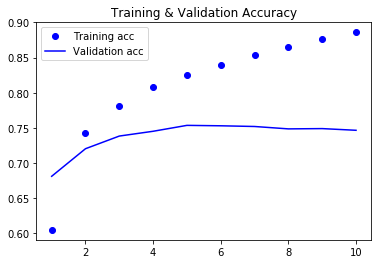

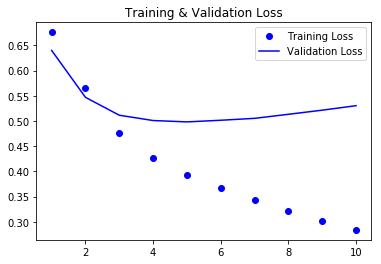

In [106]:
#################### 6.6 Loading the IMDB data for use with an Embedding layer ######################################

from keras.datasets import imdb
from keras import preprocessing
from keras.models import Sequential
from keras.layers import Flatten, Dense, Embedding
import matplotlib.pyplot as plt

### Number of words to consider as features
max_features = 10000

### Cuts off the text after this number of words
maxlen = 20

### Load data as list of Integers
(x_train, y_train), (x_test, y_test) = imdb.load_data(num_words=max_features)



###Turns the lists of integers into a 2D integer tensor of shape (samples, maxlen)
x_train = preprocessing.sequence.pad_sequences(x_train, maxlen=maxlen)
x_test = preprocessing.sequence.pad_sequences(x_test, maxlen=maxlen)
# print(x_train)

model = Sequential()

### Specifies the maximum input length to the Embedding layer so you can later flatten the embedded inputs. 
model.add(Embedding(10000, 8, input_length=maxlen))
### After the Embedding layer, the activations have shape (samples, maxlen, 8).

### Flattens the 3D tensor of embeddings into a 2D tensor of shape (samples, maxlen * 8)
model.add(Flatten())

### Adds the classifier on top
model.add(Dense(1, activation='sigmoid'))
model.summary()

# model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['acc'])
# history = model.fit(x_train, y_train, epochs=10, batch_size=32, validation_split=0.2)

#################### Plotting results ######################################################################

acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(acc) + 1)

plt.plot(epochs, acc, 'bo', label = 'Training acc')
plt.plot(epochs, val_acc, 'b', label = 'Validation acc')
plt.title("Training & Validation Accuracy")
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label = 'Training Loss')
plt.plot(epochs, val_loss, 'b', label = 'Validation Loss')
plt.title("Training & Validation Loss")
plt.legend()

plt.show()

############################## DOWNLOADING THE IMDB DATA AS RAW TEXT ##############################################

Let’s collect the individual training reviews from downloaded raw IMDB dataset (path: C:\Users\Satish\python_files\IMDB_Data\aclImdb\aclImdb\test) into a list of strings, one string per review. collect the review labels (positive/negative) into a labels list.

In [116]:
#################### 6.8 Processing the labels of the raw IMDB data ##############################################

import os

imdb_dir  = '/Users/Satish/python_files/IMDB_Data/aclImdb/aclImdb/'
train_dir = os.path.join(imdb_dir, 'test')

labels = []
texts = []

for label_type in ['neg', 'pos']:
    dir_name = os.path.join(train_dir, label_type)
#     print(dir_name)
    for fname in os.listdir(dir_name):
#         print(fname[-4:])
        if fname[-4:] == '.txt':
            f = open(os.path.join(dir_name, fname), encoding="utf8")
            texts.append(f.read())
#             print(texts)
            f.close()
            if label_type == 'neg':
                labels.append(0)
#                 print(labels)
            else:
                labels.append(1)
#     print(labels.count)
# texts.count

<built-in method count of list object at 0x00000277F7C774C8>
<built-in method count of list object at 0x00000277F7C774C8>


############################## TOKENIZING THE DATA ##############################################

Let’s vectorize the text and prepare a training and validation split.
Because pretrained word embeddings are meant to be particularly useful on problems where little training data is available.
Twist is restrict the training data to the first 200 samples and learn to classify movie reviews after looking at just 200 examples.

In [122]:
#################### 6.9 Tokenizing the text of the raw IMDB data ##############################################

from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
import numpy as np

### Cuts off reviews after 100 words
maxlen = 100
### Trains on 200 samples
training_samples = 200
### Validates on 10,000 samples
validation_samples = 10000
### Considers only the top 10,000 words in the dataset
max_words = 10000

### Tokenizing the text
tokenizer = Tokenizer(num_words=max_words)
tokenizer.fit_on_texts(texts)
sequences = tokenizer.texts_to_sequences(texts)
word_index = tokenizer.word_index
# print('Found %s unique tokens.' % len(word_index))

data = pad_sequences(sequences, maxlen=maxlen)
labels = np.asarray(labels)

# print('shape of data tensor: ', data.shape)
# print('shape of label tensor: ', labels.shape)
# print(data[0:5,0:100])

### Shuffle the data to re-order the order of the data as data is order like all -ve first and then +ve.
indices = np.arange(data.shape[0])
np.random.shuffle(indices)
data = data[indices]
labels = labels[indices]
# print(data[0:5,0:100])

### Splits the data into a training set and a validation set
x_train = data[:training_samples]
y_train = labels[:training_samples]
x_test = data[training_samples: training_samples + validation_samples]
y_test = labels[training_samples: training_samples + validation_samples]


[[   0    0    0    0    0    0    0    0    0    0    0    0    0    0
    11   14  125   35  445  329    4  672  208   30    1   97  146    1
   489 5452    4 8715   36    1  146    1 2265    1 1354 2007    7   91
    53 2842   17    1 7179   12   10    7  452   20    2  322   70 5912
  5956 1897  208   17    2  466 7105  281    3 1940 2709 5196  122   28
     7   26    4 4714 2505  659  149   16   17 4543 2259   11   14  137
    86  208   30  103 1499   42  393  132   77 1468   25  393    8    2
  1927  732]
 [  31 3856    3   47    2  890 2098   33    5   86  247   31  186   45
     1  256    6    6   16 2029   55   23   10    1  107 3667  372 5381
    82    1 8593  970   51   50   26    7  376  580    1  979 1838    3
    17   67 2780 8276    2  165    4 1836 3354    5 8642   90   15   67
  3339  868    6    6   30  178   11    7    2  305 1037    3 1743   19
    18   10    7   94  154   16    1  590  161   56   74    3 2535    3
    86   35  445  740  885  140 1074    3  716    9

############################## PREPROCESSING THE EMBEDDINGS ##############################################

Download the precomputed GLOVE WORD embeddings from 2014 English Wikipedia, from nlp.stanford.edu/projects/glove called glove.6B.zip containing 100-dimensional embedding vectors for 400,000 words.
Parse the unzipped file (a .txt file) to build an index that maps words (as strings) to their vector representation (as number vectors).

In [131]:
#################### 6.10 Parsing the GloVe word-embeddings file ##############################################

glove_dir = '/Users/Satish/python_files/IMDB_Data/glove.6B'

# embeddings_index = {}
# f = open(os.path.join(glove_dir, 'glove.6B.100d.txt'), encoding='utf8')
# for line in f:
#     values = line.split()
# #     print(values)
#     word = values[0]
# #     print(word)
#     coefs = np.asarray(values[1:], dtype='float32')
#     embeddings_index[word] = coefs
# #     print(embeddings_index)
# f.close()

print('Found %s word vectors.' % len(embeddings_index))
# print(embeddings_index.keys)

Found 400000 word vectors.


Now, build an embedding matrix shape of  (max_words, embedding_dim) that can load into an Embedding layer. 
each entry i contains the embedding_dim-dimensional vector for the word of index i in the reference word index (built during tokenization).
index 0 isn’t supposed to stand for any word or token. it’s a placeholder.

In [140]:
#################### 6.11 Preparing the GloVe word-embeddings matrix ##############################################

embedding_dim = 100
# print(max_words)
# embedding_matrix = np.zeros((max_words, embedding_dim))
# for word, i in word_index.items():
#     if i < max_words:
#         embedding_vector = embeddings_index.get(word)
#         if embedding_vector is not None:
#             ### Words not found in the embedding index will be all zeros
#             embedding_matrix[i] = embedding_vector

# embedding_matrix[2,0:100]           
        

array([-0.27085999,  0.044006  , -0.02026   , -0.17395   ,  0.6444    ,
        0.71213001,  0.35510001,  0.47138   , -0.29637   ,  0.54426998,
       -0.72294003, -0.0047612 ,  0.040611  ,  0.043236  ,  0.29729   ,
        0.10725   ,  0.40156001, -0.53662002,  0.033382  ,  0.067396  ,
        0.64556003, -0.085523  ,  0.14103   ,  0.094539  ,  0.74947   ,
       -0.19400001, -0.68739003, -0.41740999, -0.22807001,  0.12      ,
       -0.48999   ,  0.80944997,  0.045138  , -0.11898   ,  0.20161   ,
        0.39276001, -0.20121001,  0.31354001,  0.75304002,  0.25907001,
       -0.11566   , -0.029319  ,  0.93498999, -0.36067   ,  0.52420002,
        0.23706   ,  0.52714998,  0.22869   , -0.51958001, -0.79348999,
       -0.20367999, -0.50186998,  0.18748   ,  0.94282001, -0.44834   ,
       -3.67919993,  0.044183  , -0.26751   ,  2.19970012,  0.241     ,
       -0.033425  ,  0.69553   , -0.64472002, -0.0072277 ,  0.89574999,
        0.20015   ,  0.46493   ,  0.61932999, -0.1066    ,  0.08

In [144]:
#################### 6.12 Model definition ##############################################################

from keras.models import Sequential
from keras.layers import Flatten, Dense, Embedding

model = Sequential()
model.add(Embedding(max_words, embedding_dim, input_length=maxlen))
model.add(Flatten())
model.add(Dense(32, activation='relu'))
model.add(Dense(1, activation='sigmoid'))
model.summary()


_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_5 (Embedding)      (None, 100, 100)          1000000   
_________________________________________________________________
flatten_5 (Flatten)          (None, 10000)             0         
_________________________________________________________________
dense_7 (Dense)              (None, 32)                320032    
_________________________________________________________________
dense_8 (Dense)              (None, 1)                 33        
Total params: 1,320,065
Trainable params: 1,320,065
Non-trainable params: 0
_________________________________________________________________


#################### LOADING THE GLOVE EMBEDDINGS IN THE MODEL ##############################################

The Embedding layer has a single weight matrix i.e. a 2D float matrix, where each entry i is the word vector meant to be associated with index i.
Load the GloVe matrix  into the Embedding layer i.e. the first layer in the model.

In [146]:
#################### 6.13 Loading pretrained word embeddings into the Embedding layer ############################

model.layers[0].set_weights([embedding_matrix])

### freeze the Embedding layer by setting its trainable attribute to False
model.layers[0].trainable = False


Train on 200 samples, validate on 10000 samples
Epoch 1/10
200/200 [==============================] - 1s 7ms/step - loss: 1.7416 - acc: 0.6100 - val_loss: 0.6913 - val_acc: 0.7321
Epoch 2/10
200/200 [==============================] - 1s 5ms/step - loss: 0.6335 - acc: 0.6800 - val_loss: 0.6639 - val_acc: 0.7320
Epoch 3/10
200/200 [==============================] - 1s 6ms/step - loss: 0.4650 - acc: 0.7400 - val_loss: 0.6067 - val_acc: 0.7308
Epoch 4/10
200/200 [==============================] - 1s 6ms/step - loss: 0.3750 - acc: 0.8450 - val_loss: 0.7710 - val_acc: 0.7316
Epoch 5/10
200/200 [==============================] - 1s 6ms/step - loss: 0.2361 - acc: 0.9200 - val_loss: 0.9012 - val_acc: 0.7319
Epoch 6/10
200/200 [==============================] - 1s 6ms/step - loss: 0.2009 - acc: 0.9350 - val_loss: 0.7114 - val_acc: 0.5644
Epoch 7/10
200/200 [==============================] - 1s 5ms/step - loss: 0.0823 - acc: 1.0000 - val_loss: 0.6704 - val_acc: 0.7005
Epoch 8/10
200/200 [========

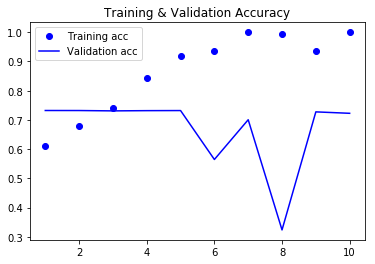

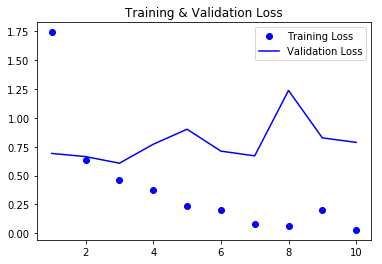

In [147]:
#################### 6.14 Training, evaluation and Plotting the results ###########################################
import matplotlib.pyplot as plt

model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['acc'])
history = model.fit(x_train, y_train, epochs=10, batch_size=32, validation_data=(x_test, y_test))
model.save_weights('pre_trained_glove_model.h5')

acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(acc) + 1)

plt.plot(epochs, acc, 'bo', label = 'Training acc')
plt.plot(epochs, val_acc, 'b', label = 'Validation acc')
plt.title("Training & Validation Accuracy")
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label = 'Training Loss')
plt.plot(epochs, val_loss, 'b', label = 'Validation Loss')
plt.title("Training & Validation Loss")
plt.legend()

plt.show()

### The model quickly starts overfitting, which is unsurprising given the small number of training samples. 
### Validation accuracy has high variance for the same reason

Train the same model without loading the pretrained word embeddings and without freezing the embedding layer. And learn a task specific embedding of the input tokens, which is generally more powerful than pretrained word embeddings when lots of data is available.

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_6 (Embedding)      (None, 100, 100)          1000000   
_________________________________________________________________
flatten_6 (Flatten)          (None, 10000)             0         
_________________________________________________________________
dense_9 (Dense)              (None, 32)                320032    
_________________________________________________________________
dense_10 (Dense)             (None, 1)                 33        
Total params: 1,320,065
Trainable params: 1,320,065
Non-trainable params: 0
_________________________________________________________________
Train on 200 samples, validate on 10000 samples
Epoch 1/10
200/200 [==============================] - 2s 9ms/step - loss: 0.6743 - acc: 0.6350 - val_loss: 0.6189 - val_acc: 0.7320
Epoch 2/10
200/200 [==============================] - 1s 6ms/step - loss: 0.4238 - a

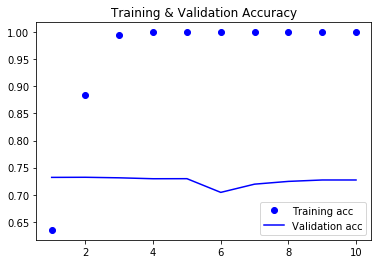

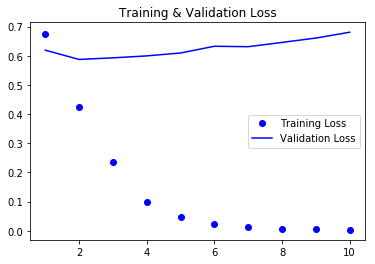

In [148]:
#################### 6.16 Training the same model without pretrained word embeddings #################################

from keras.models import Sequential
from keras.layers import Embedding, Dense, Flatten

model = Sequential()
model.add(Embedding(max_words, embedding_dim, input_length=maxlen))
model.add(Flatten())
model.add(Dense(32, activation='relu'))
model.add(Dense(1, activation='sigmoid'))
model.summary()

model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['acc'])
history = model.fit(x_train, y_train, batch_size=32, epochs=10, validation_data=(x_test,y_test))

acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(acc) + 1)

plt.plot(epochs, acc, 'bo', label = 'Training acc')
plt.plot(epochs, val_acc, 'b', label = 'Validation acc')
plt.title("Training & Validation Accuracy")
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label = 'Training Loss')
plt.plot(epochs, val_loss, 'b', label = 'Validation Loss')
plt.title("Training & Validation Loss")
plt.legend()

plt.show()

### Validation accuracy stalls in the low 70s. So in this case, pretrained word embeddings outperform jointly learned embeddings. 
### If you increase the number of training samples, this will quickly stop being the case

In [ ]:
Let’s evaluate the model on the test data. First, you need to tokenize the test data.

In [149]:
#################### 6.17 Tokenizing the data of the test set ##################################################

imdb_dir  = '/Users/Satish/python_files/IMDB_Data/aclImdb/aclImdb/'
test_dir = os.path.join(imdb_dir, 'test')

labels = []
texts = []

for label_type in ['neg', 'pos']:
    dir_name = os.path.join(test_dir, label_type)
#     print(dir_name)
    for fname in os.listdir(dir_name):
#         print(fname[-4:])
        if fname[-4:] == '.txt':
            f = open(os.path.join(dir_name, fname), encoding="utf8")
            texts.append(f.read())
            f.close()
            if label_type == 'neg':
                labels.append(0)
            else:
                labels.append(1)
                
sequences = tokenizer.texts_to_sequences(texts)
x_val = pad_sequences(sequences, maxlen=maxlen) 
y_val = np.asarray(labels)

#################### 6.18 Evaluating the model on the test set ##################################################

model.load_weights('pre_trained_glove_model.h5')
model.evaluate(x_val, y_val)

### test accuracy of 71.31%. Working with just a handful of training samples is difficult!

17243/17243 [==============================] - 2s 116us/step


[0.828723011662289, 0.7131589630579047]